Import essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Import data from file

In [ ]:
train_df = pd.read_csv( 'data/telco-customer-churn-train.csv', index_col=0 )
valid_df = pd.read_csv( 'data/telco-customer-churn-validation.csv', index_col=0 )
test_df  = pd.read_csv( 'data/telco-customer-churn-test.csv', index_col=0 )
train_df

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,NaN,NaN,52,Long Beach,4590,Month-to-Month,United States,...,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,NaN,NaN,34,San Francisco,5602,One Year,United States,...,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,NaN,NaN,63,Olivehurst,4458,One Year,United States,...,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,NaN,NaN,38,Westlake Village,4115,Month-to-Month,United States,...,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


<Axes: xlabel='Churn', ylabel='count'>

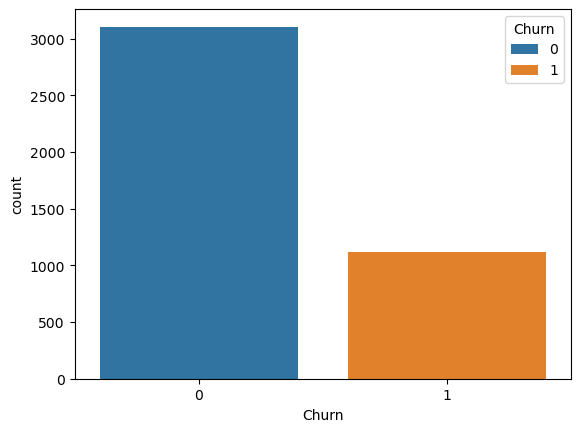

In [3]:
sns.countplot(x ='Churn', hue = "Churn", data = train_df)

Evaluating data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   object 
 1

Print missing values for each feature

In [5]:
train_na = train_df.isna().mean() * 100
valid_na = train_df.isna().mean() * 100
test_na = train_df.isna().mean() * 100
train_na[ train_na > 0 ]

Churn Category    73.467456
Churn Reason      73.467456
Internet Type     20.970414
Offer             55.005917
dtype: float64

Remove columns with high missign values

In [6]:
# Remove high missing columns
missing_threshold = 0.7
high_missing_columns = train_df.columns[ train_df.isna().mean() > missing_threshold ]
train_df = train_df.drop( columns=high_missing_columns )
valid_df = valid_df.drop( columns=high_missing_columns )
test_df  = test_df.drop( columns=high_missing_columns )
print( high_missing_columns )

# Fill in missing values
mode_values = train_df.mode().loc[ 0 ].to_dict()
print( f'Mode Values (for n/a filling): { mode_values } ')
median_values = train_df.median( numeric_only=True ).to_dict()
print(f' Median Values (for n/a filling): { median_values } ')

for column in train_df.columns:
  if train_df[ column ].isna().any():
    if train_df[ column ].dtype == 'object':
      train_df[ column ] = train_df[ column ].fillna( mode_values[ column ] )
    else:
      train_df[ column ] = train_df[ column ].fillna( median_values[ column ] )
      
  if valid_df[ column ].isna().any():
    if valid_df[ column ].dtype == 'object':
      valid_df[ column ] = valid_df[ column ].fillna( mode_values[ column ] )
    else:
      valid_df[ column ] = valid_df[ column ].fillna( median_values[ column ] )
      
  if test_df[ column ].isna().any():
    if test_df[ column ].dtype == 'object':
      test_df[ column ] = test_df[ column ].fillna( mode_values[ column ] )
    else:
      test_df[ column ] = test_df[ column ].fillna( median_values[ column ] )

train_df

Index(['Churn Category', 'Churn Reason'], dtype='object')
Mode Values (for n/a filling): {'Age': 42.0, 'Avg Monthly GB Download': 0.0, 'Avg Monthly Long Distance Charges': 0.0, 'Churn Score': 91.0, 'City': 'Los Angeles', 'CLTV': 5527.0, 'Contract': 'Month-to-Month', 'Country': 'United States', 'Customer ID': '0002-ORFBO', 'Customer Status': 'Stayed', 'Dependents': 0.0, 'Device Protection Plan': 0.0, 'Gender': 'Male', 'Internet Service': 1.0, 'Internet Type': 'Fiber Optic', 'Lat Long': '33.141265, -116.967221', 'Latitude': 32.85723, 'Longitude': -117.209774, 'Married': 0.0, 'Monthly Charge': 20.05, 'Multiple Lines': 0.0, 'Number of Dependents': 0.0, 'Number of Referrals': 0.0, 'Offer': 'Offer B', 'Online Backup': 0.0, 'Online Security': 0.0, 'Paperless Billing': 1.0, 'Partner': 0.0, 'Payment Method': 'Bank Withdrawal', 'Phone Service': 1.0, 'Population': 34902.0, 'Premium Tech Support': 0.0, 'Quarter': 'Q3', 'Referred a Friend': 0.0, 'Satisfaction Score': 3.0, 'Senior Citizen': 0.0, 'St

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,City,CLTV,Contract,Country,Customer ID,Customer Status,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,51,San Mateo,4849,Two Year,United States,4526-ZJJTM,Stayed,...,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,27,Sutter Creek,3715,Month-to-Month,United States,5302-BDJNT,Stayed,...,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,59,Santa Cruz,5092,Month-to-Month,United States,5468-BPMMO,Stayed,...,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,49,Brea,2068,One Year,United States,2212-LYASK,Stayed,...,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,88,San Jose,4026,One Year,United States,0378-XSZPU,Churned,...,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,52,Long Beach,4590,Month-to-Month,United States,2369-FEVNO,Joined,...,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,34,San Francisco,5602,One Year,United States,4824-GUCBY,Stayed,...,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,63,Olivehurst,4458,One Year,United States,0859-YGKFW,Stayed,...,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,38,Westlake Village,4115,Month-to-Month,United States,0699-NDKJM,Stayed,...,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


Make sure there are no more missing values

In [7]:
train_na = train_df.isna().mean() * 100
print( train_na )
train_na[ train_na > 0 ]

Age                                  0.0
Avg Monthly GB Download              0.0
Avg Monthly Long Distance Charges    0.0
Churn Score                          0.0
City                                 0.0
CLTV                                 0.0
Contract                             0.0
Country                              0.0
Customer ID                          0.0
Customer Status                      0.0
Dependents                           0.0
Device Protection Plan               0.0
Gender                               0.0
Internet Service                     0.0
Internet Type                        0.0
Lat Long                             0.0
Latitude                             0.0
Longitude                            0.0
Married                              0.0
Monthly Charge                       0.0
Multiple Lines                       0.0
Number of Dependents                 0.0
Number of Referrals                  0.0
Offer                                0.0
Online Backup   

Series([], dtype: float64)

Remove outliers in the dataset

In [8]:
# def iqr(df):
#     numeric_cols = df.select_dtypes(include=['number']).columns
#     mask = pd.Series(True, index=df.index)

#     for col in numeric_cols:
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower = Q1 - 2 * IQR
#         upper = Q3 + 2 * IQR
#         mask &= (df[col] >= lower) & (df[col] <= upper)

#     return df[mask]

def zscore_outlier(df, threshold=3):
    numeric_cols = df.select_dtypes(include='number').columns
    z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
    
    return df[(np.abs(z_scores) < threshold).all(axis=1)]

train_df = zscore_outlier(train_df)
print(train_df.shape)
train_df

(3777, 50)


,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,City,CLTV,Contract,Country,Customer ID,Customer Status,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,51,San Mateo,4849,Two Year,United States,4526-ZJJTM,Stayed,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,27,Sutter Creek,3715,Month-to-Month,United States,5302-BDJNT,Stayed,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,59,Santa Cruz,5092,Month-to-Month,United States,5468-BPMMO,Stayed,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,49,Brea,2068,One Year,United States,2212-LYASK,Stayed,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,88,San Jose,4026,One Year,United States,0378-XSZPU,Churned,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,62,2,31.97,33,Sherman Oaks,3233,Month-to-Month,United States,4811-JBUVU,Stayed,...,30,2723.15,0,959.10,0.0,3682.25,0,1,91423,0
4220,36,0,7.76,52,Long Beach,4590,Month-to-Month,United States,2369-FEVNO,Joined,...,1,19.90,0,7.76,0.0,27.66,0,0,90806,0
4222,56,0,28.06,63,Olivehurst,4458,One Year,United States,0859-YGKFW,Stayed,...,18,345.90,0,505.08,0.0,850.98,0,0,95961,0
4223,45,22,0.00,38,Westlake Village,4115,Month-to-Month,United States,0699-NDKJM,Stayed,...,57,3437.45,0,0.00,0.0,3437.45,0,1,91361,0


Display all columns with categorical data

In [9]:
categorical_cols = train_df.select_dtypes( include=[ "object" ] ).columns
categorical_cols

Index(['City', 'Contract', 'Country', 'Customer ID', 'Customer Status',
       'Gender', 'Internet Type', 'Lat Long', 'Offer', 'Payment Method',
       'Quarter', 'State'],
      dtype='object')

Show categorical columns with more than 10 unique values and remove them

In [10]:
for col in categorical_cols:
    if train_df[ col ].nunique() > 10:
        print( f"removed { col } column with { train_df[ col ].nunique() } unique values" )
        train_df.drop( columns=col, inplace=True )
        valid_df.drop( columns=col, inplace=True )
        test_df.drop( columns=col, inplace=True )

removed City column with 1061 unique values
removed Customer ID column with 3777 unique values
removed Lat Long column with 1580 unique values


/tmp/ipykernel_3469055/3121866737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3469055/3121866737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3469055/3121866737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )


Show distribution of all features

In [11]:
# for col in train_df.columns:
#     plt.figure( figsize=(10,6) )
#     sns.histplot( train_df[col] )
#     plt.show()
    
#     plt.figure( figsize=(10,6) )
#     # sns.scatterplot(train_df, x=col, y='Churn', hue="size", alpha=0.4)
#     plt.scatter(train_df[col], train_df['Churn'], alpha=0.01)
#     plt.show()

Remove unnecessary or imbalanced features

In [12]:
unnecessary_features = [
    "Avg Monthly GB Download",
    "Country",
    "Customer Status",
    "Dependents",
    "Device Protection Plan",
    "Gender",
    "Internet Service",
    "Internet Type",
    "Married",
    "Multiple Lines",
    "Offer",
    "Online Backup",
    "Online Security",
    "Paperless Billing",
    "Partner",
    "Payment Method",
    "Phone Service",
    "Premium Tech Support",
    "Quarter",
    "Referred a Friend",
    "Senior Citizen",
    "State",
    "Streaming Movies",
    "Streaming Music",
    "Streaming TV",
    "Total Extra Data Charges",
    "Total Refunds",
    "Under 30",
    "Unlimited Data"
]

for col in unnecessary_features:
    train_df.drop( columns=col, inplace=True )
    valid_df.drop( columns=col, inplace=True )
    test_df.drop( columns=col, inplace=True )

/tmp/ipykernel_3469055/3583418304.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3469055/3583418304.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3469055/3583418304.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop( columns=col, inplace=True )
/tmp/ipykernel_3469055/3583418304.py:34: SettingW

Encoding categorical data using one-hot encoding

In [13]:
categorical_cols = train_df.select_dtypes( include=[ "object" ] ).columns
train_df = pd.get_dummies( train_df, columns=categorical_cols, drop_first=True, dtype=int )
valid_df = pd.get_dummies( valid_df, columns=categorical_cols, drop_first=True, dtype=int )
test_df  = pd.get_dummies( test_df, columns=categorical_cols, drop_first=True, dtype=int )
train_df

,Age,Avg Monthly Long Distance Charges,Churn Score,CLTV,Latitude,Longitude,Monthly Charge,Number of Dependents,Number of Referrals,Population,Satisfaction Score,Tenure in Months,Total Charges,Total Long Distance Charges,Total Revenue,Zip Code,Churn,Contract_One Year,Contract_Two Year
0,72,19.44,51,4849,37.538309,-122.305109,88.40,0,1,37926,3,25,2191.15,486.00,2677.15,94403,0,0,1
1,27,45.62,27,3715,38.432145,-120.770690,95.50,0,0,4610,3,35,3418.20,1596.70,5014.90,95685,0,0,0
2,59,16.07,59,5092,37.007882,-122.065975,19.60,0,3,4563,5,46,851.20,739.22,1590.42,95064,0,0,0
3,25,0.00,49,2068,33.924143,-117.793870,45.85,0,3,1408,4,27,1246.40,0.00,1276.40,92823,0,1,0
4,31,17.22,88,4026,37.311088,-121.961786,60.30,0,1,29914,2,58,3563.80,998.76,4562.56,95117,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,62,31.97,33,3233,34.146957,-118.432138,89.90,0,0,29387,3,30,2723.15,959.10,3682.25,91423,0,0,0
4220,36,7.76,52,4590,33.802664,-118.179971,19.90,0,0,49647,3,1,19.90,7.76,27.66,90806,0,0,0
4222,56,28.06,63,4458,39.082568,-121.553250,20.05,3,1,6439,5,18,345.90,505.08,850.98,95961,0,1,0
4223,45,0.00,38,4115,34.130992,-118.894673,58.75,0,1,18735,3,57,3437.45,0.00,3437.45,91361,0,0,0


Normalize using z-score standardization and calculating Average Monthly Charges

In [14]:
train_df['Average Monthly Charges'] = train_df['Total Charges'] / train_df['Tenure in Months']
valid_df['Average Monthly Charges'] = valid_df['Total Charges'] / valid_df['Tenure in Months']
test_df['Average Monthly Charges']  = test_df['Total Charges']  / test_df['Tenure in Months']

numerical_cols = train_df.select_dtypes( include=[ "number" ] ).columns.difference( [ 'Churn' ] )
df_mean = train_df[ numerical_cols ].mean()
df_std = train_df[ numerical_cols ].std()

non_zero_std = df_std[ df_std != 0 ].index

train_df[ numerical_cols ] = ( train_df[ numerical_cols ] - df_mean )
train_df[ non_zero_std ] = train_df[ non_zero_std ] / df_std[non_zero_std]

valid_df[ numerical_cols ] = ( valid_df[ numerical_cols ] - df_mean )
valid_df[ non_zero_std ] = valid_df[ non_zero_std ] / df_std[non_zero_std]

test_df[ numerical_cols ] = ( test_df[ numerical_cols ] - df_mean )
test_df[ non_zero_std ] = test_df[ non_zero_std ] / df_std[non_zero_std]

train_df

,Age,Avg Monthly Long Distance Charges,Churn Score,CLTV,Latitude,Longitude,Monthly Charge,Number of Dependents,Number of Referrals,Population,Satisfaction Score,Tenure in Months,Total Charges,Total Long Distance Charges,Total Revenue,Zip Code,Churn,Contract_One Year,Contract_Two Year,Average Monthly Charges
0,1.532284,-0.209121,-0.353802,0.395701,0.520617,-1.160805,0.813974,-0.493751,-0.310257,0.838487,-0.193139,-0.270894,-0.006473,-0.285410,-0.089183,0.470777,0,-0.515030,1.685695,0.784713
1,-1.180040,1.501499,-1.487309,-0.573226,0.882999,-0.449270,1.050557,-0.493751,-0.642789,-0.831150,-0.193139,0.135964,0.542780,1.061917,0.738962,1.161517,0,-0.515030,-0.593070,1.117144
2,0.748724,-0.429320,0.024034,0.603329,0.305570,-1.049915,-1.478544,-0.493751,0.354806,-0.833505,1.464781,0.583507,-0.606262,0.021757,-0.474156,0.826923,0,-0.515030,-0.593070,-1.509904
3,-1.300588,-1.479345,-0.448261,-1.980477,-0.944649,0.931130,-0.603855,-0.493751,0.354806,-0.991618,0.635821,-0.189522,-0.429363,-0.874949,-0.585397,-0.380526,0,1.941119,-0.593070,-0.591992
4,-0.938944,-0.354178,1.393688,-0.307497,0.428497,-1.001601,-0.122359,-0.493751,-0.310257,0.436964,-1.022098,1.071736,0.607953,0.336590,0.578721,0.855479,1,1.941119,-0.593070,-0.084830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,0.929545,0.609598,-1.203932,-0.985063,-0.854315,0.635155,0.863957,-0.493751,-0.642789,0.410554,-0.193139,-0.067465,0.231661,0.288481,0.266873,-1.134846,0,-0.515030,-0.593070,0.888445
4220,-0.637575,-0.972301,-0.306573,0.174403,-0.993899,0.752089,-1.468547,-0.493751,-0.642789,1.425887,-0.193139,-1.247351,-0.978369,-0.865536,-1.027762,-1.467285,0,-0.515030,-0.593070,-1.463586
4222,0.567902,0.354116,0.212951,0.061618,1.146695,-0.812156,-1.463549,2.762767,-0.310257,-0.739489,1.464781,-0.555694,-0.832445,-0.262265,-0.736101,1.310226,0,1.941119,-0.593070,-1.486264
4223,-0.095110,-1.479345,-0.967785,-0.231453,-0.860787,0.420670,-0.174007,-0.493751,-0.310257,-0.123273,-0.193139,1.031050,0.551396,-0.874949,0.180152,-1.168251,0,-0.515030,-0.593070,-0.122620


Split features and target

In [15]:
X_train = train_df.drop( columns=[ 'Churn' ] )
y_train = train_df[ 'Churn' ]

X_valid = valid_df.drop( columns=[ 'Churn' ] )
y_valid = valid_df[ 'Churn' ]

X_test = test_df.drop( columns=[ 'Churn' ] )
y_test = test_df[ 'Churn' ]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((3777, 19), (3777,), (1409, 19), (1409,), (1409, 19), (1409,))

Define sigmoid, bce loss, and gradient decent functions

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def bce(w, X, y):
    z = X @ w
    predictions = sigmoid(z)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def gradient_descent(X_train, y_train, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
    w = np.zeros(X_train.shape[1])
    loss_history = [bce(w, X_train, y_train)]

    for step in range(1, n_steps + 1):
        z = X_train @ w
        predictions = sigmoid(z)
        errors = predictions - y_train
        grad = X_train.T @ errors / len(y_train)

        w -= learning_rate * grad
        loss = bce(w, X_train, y_train)
        loss_history.append(loss)

        if np.abs(loss_history[-2] - loss_history[-1]) < tolerance:
            print(f'Converged at step {step}')
            break

    return w, loss_history

def predict(w, X_test):
    y_prob = sigmoid(X_test @ w)
    y_pred = (y_prob > 0.5).astype(int)
    return y_pred

weights, loss_history = gradient_descent( X_train, y_train, learning_rate=0.05, n_steps=2000 )

print(f'Optimized weights: {weights}')

Converged at step 1950
Optimized weights: Age                                  0.188903
Avg Monthly Long Distance Charges   -0.061496
Churn Score                          1.226469
CLTV                                 0.060409
Latitude                            -0.048101
Longitude                            0.035080
Monthly Charge                       0.249712
Number of Dependents                -0.154701
Number of Referrals                 -0.175028
Population                           0.108860
Satisfaction Score                  -2.458649
Tenure in Months                    -0.130695
Total Charges                       -0.372325
Total Long Distance Charges          0.143686
Total Revenue                       -0.251767
Zip Code                             0.080836
Contract_One Year                   -0.321104
Contract_Two Year                   -0.333640
Average Monthly Charges              0.225451
dtype: float64


Calculating accuracy, recall, and AUC-ROC curve and evaluating test set

Model Accuracy: 0.8637331440738112
Model Recall (Positive Class: 1): 0.9973262032085561
Model Recall (Positive Class: 0): 0.8154589371980676


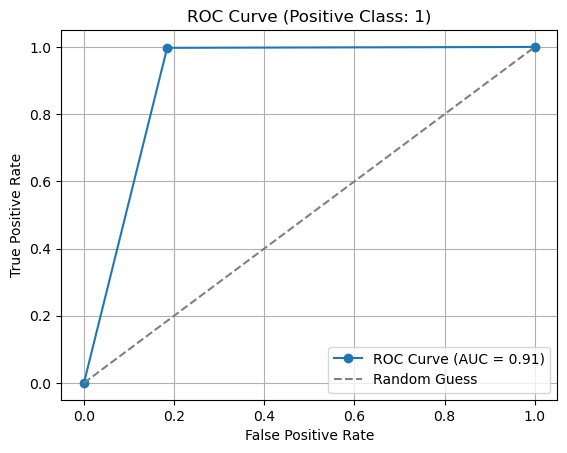

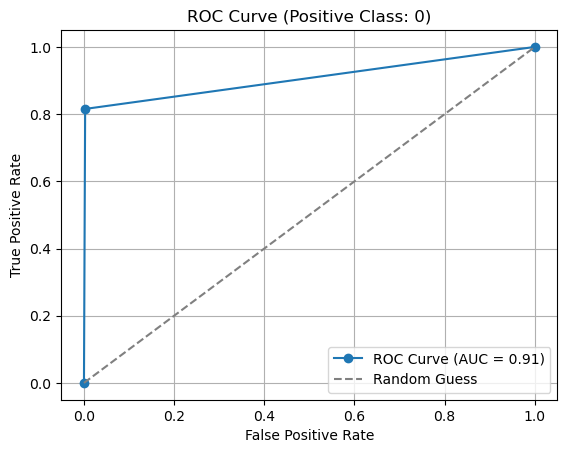

In [17]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

def recall(y_true, y_pred, positive_class=1):
    tp = np.sum((y_true == positive_class) & (y_pred == positive_class))
    p = np.sum(y_true == positive_class)
    
    return tp / p

def roc_auc_curve(y_true, y_pred, positive_class=1):
    tp = np.sum((y_true == positive_class) & (y_pred == positive_class))
    fp = np.sum((y_true != positive_class) & (y_pred == positive_class))
    tn = np.sum((y_true != positive_class) & (y_pred != positive_class))
    fn = np.sum((y_true == positive_class) & (y_pred != positive_class))

    tpr = tp / (tp + fn) # True Possitive Rate (Sensitivity)
    fpr = fp / (fp + tn) # False Positive Rate (1 - Specificity)
    
    # AUC (sum of the area of the two triangles)
    auc = 0.5 + np.abs(fpr - tpr) / 2

    plt.plot([0, fpr, 1], [0, tpr, 1], marker='o', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Positive Class: {positive_class})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return auc


y_pred = predict(weights, X_test)

print(f'Model Accuracy: {accuracy(y_test, y_pred)}')

print(f'Model Recall (Positive Class: 1): {recall(y_test, y_pred, 1)}')
print(f'Model Recall (Positive Class: 0): {recall(y_test, y_pred, 0)}')

auc = roc_auc_curve(y_test, y_pred, 1)
auc = roc_auc_curve(y_test, y_pred, 0)

## تحلیل نتایج مدل در هردو کلاس

با وجود عدم توازن کلاس‌ها، مدل توانست به دقت (Accuracy) 86.37% برسد. با این حال، به دلیل همین عدم توازن، دقت به تنهایی شاخص مناسبی نیست. مدل همچنین توانسته Recall بسیار بالایی برای کلاس 1 معادل 99.73% داشته باشد که نشان می‌دهد تقریباً همه‌ی مشتریان در معرض ریزش را به‌درستی شناسایی کرده است.

از طرف دیگر، Recall کلاس 0 برابر با 81.54% بوده که نسبتاً پایین‌تر از دقت کلاس اول است، به این معنا که حدود 18% از مشتریان وفادار به اشتباه به عنوان در حال ترک طبقه‌بندی شده‌اند. با وجود این، مقدار AUC در هر دو کلاس حدود 91% به دست آمده که نشان می‌دهد مدل توانایی بسیار خوبی در تفکیک بین دو کلاس دارد، حتی با وجود متوازن نبود داده‌ها.

در تحلیل ویژگی‌ها نیز،  ویژگی‌های Satisfaction Score و Churn Score با ضرایب منفی قابل توجه، مهم‌ترین فاکتور‌های تأثیرگذار در Churn میباشند.


Balance dataset by downsampling the majority class (class 1)

Optimized weights: Age                                  0.073863
Avg Monthly Long Distance Charges    0.064904
Churn Score                          1.429383
CLTV                                -0.021518
Latitude                             0.001678
Longitude                            0.097071
Monthly Charge                       0.287355
Number of Dependents                -0.198177
Number of Referrals                 -0.271037
Population                           0.120401
Satisfaction Score                  -2.577775
Tenure in Months                    -0.165783
Total Charges                       -0.300421
Total Long Distance Charges         -0.004128
Total Revenue                       -0.237188
Zip Code                             0.091500
Contract_One Year                   -0.393191
Contract_Two Year                   -0.328314
Average Monthly Charges              0.264325
dtype: float64
Model Accuracy: 0.8658623136976579
Model Recall (Positive Class: 1): 0.9973262032085561
Mode

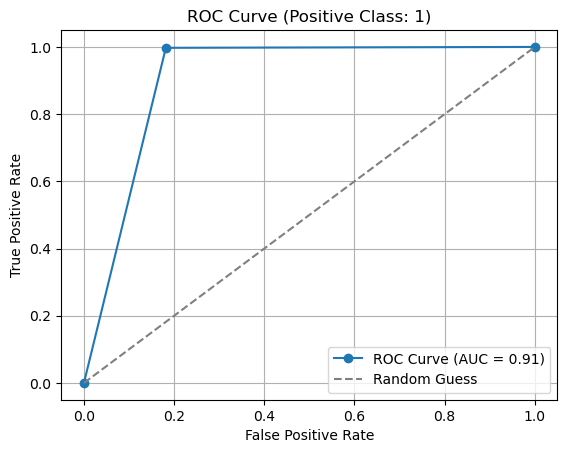

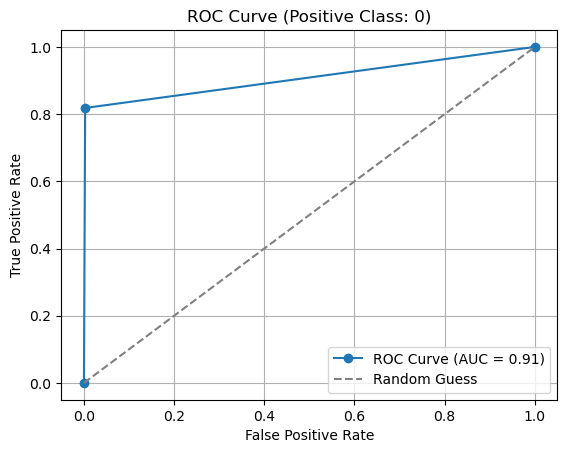

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train_df[train_df.Churn == 0]
df_minority = train_df[train_df.Churn == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])


# sns.countplot(x ='Churn', hue = "Churn", data = df_balanced)

X_train_balanced = df_balanced.drop( columns=[ 'Churn' ] )
y_train_balanced = df_balanced[ 'Churn' ]

weights, loss_history = gradient_descent( X_train_balanced, y_train_balanced, learning_rate=0.05, n_steps=2000 )

print(f'Optimized weights: {weights}')

y_pred_balanced = predict(weights, X_test)

print(f'Model Accuracy: {accuracy(y_test, y_pred_balanced)}')

print(f'Model Recall (Positive Class: 1): {recall(y_test, y_pred_balanced, 1)}')
print(f'Model Recall (Positive Class: 0): {recall(y_test, y_pred_balanced, 0)}')

auc = roc_auc_curve(y_test, y_pred_balanced, 1)
auc = roc_auc_curve(y_test, y_pred_balanced, 0)

Applying Class Weighting Method to the cost funciton

Converged at step 2195
Optimized weights: Age                                  0.190400
Avg Monthly Long Distance Charges   -0.070595
Churn Score                          1.231361
CLTV                                 0.060662
Latitude                            -0.049060
Longitude                            0.036556
Monthly Charge                       0.256949
Number of Dependents                -0.155259
Number of Referrals                 -0.175582
Population                           0.109995
Satisfaction Score                  -2.497640
Tenure in Months                    -0.123205
Total Charges                       -0.390180
Total Long Distance Charges          0.159616
Total Revenue                       -0.261111
Zip Code                             0.083981
Contract_One Year                   -0.323698
Contract_Two Year                   -0.336152
Average Monthly Charges              0.229964
dtype: float64
Model Accuracy: 0.8637331440738112
Model Recall (Positive Class: 1): 

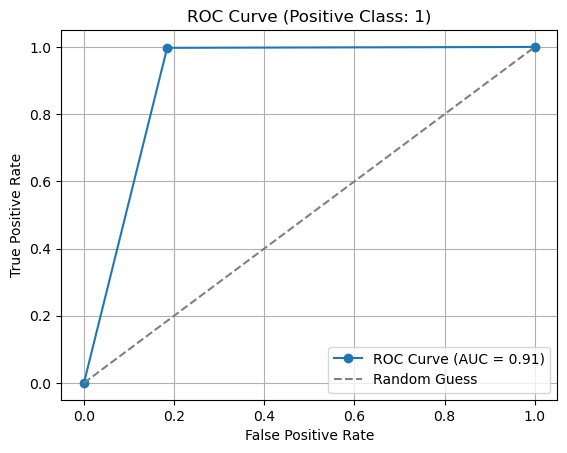

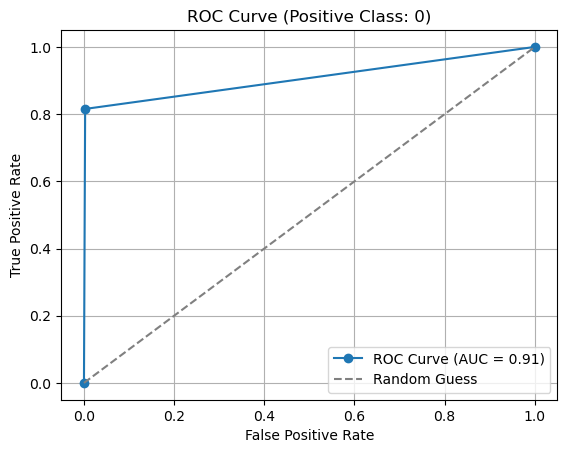

In [19]:
def bce_class_weight(w, X, y, c_w_0, c_w_1):
    z = X @ w
    predictions = sigmoid(z)
    loss = -np.mean(c_w_1 * y * np.log(predictions) + c_w_0 * (1 - y) * np.log(1 - predictions))
    return loss

def gradient_descent_modified(X_train, y_train, learning_rate=0.1, n_steps=1000, tolerance=1e-6):
    class_counts = y_train.value_counts()
    c_w_0 = class_counts[0] / class_counts[1]
    c_w_1 = 1
    
    w = np.zeros(X_train.shape[1])
    loss_history = [bce_class_weight(w, X_train, y_train, c_w_0, c_w_1)]

    for step in range(1, n_steps + 1):
        z = X_train @ w
        predictions = sigmoid(z)
        errors = predictions - y_train
        grad = X_train.T @ errors / len(y_train)

        w -= learning_rate * grad
        loss = bce_class_weight(w, X_train, y_train, c_w_0, c_w_1)
        loss_history.append(loss)

        if np.abs(loss_history[-2] - loss_history[-1]) < tolerance:
            print(f'Converged at step {step}')
            break

    return w, loss_history

weights, loss_history = gradient_descent_modified( X_train, y_train, learning_rate=0.05, n_steps=2500 )

print( f'Optimized weights: {weights}' )

y_pred = predict(weights, X_test)

print(f'Model Accuracy: {accuracy(y_test, y_pred)}')

print(f'Model Recall (Positive Class: 1): {recall(y_test, y_pred, 1)}')
print(f'Model Recall (Positive Class: 0): {recall(y_test, y_pred, 0)}')

auc = roc_auc_curve(y_test, y_pred, 1)
auc = roc_auc_curve(y_test, y_pred, 0)

Comparing my model to sklearn's LogisticRegression model

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit( X_train, y_train )
y_pred = model.predict( X_test )

model.score(X_test, y_test)

0.971611071682044